In [1]:
# https://www.andreagrandi.it/2018/04/14/machine-learning-pima-indians-diabetes/

In [2]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #for finding heatmap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
#Reading data from csv file
names=["NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"]
dataset=pd.read_csv("http://ftp.ics.uci.edu/pub/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data",names=names);


In [4]:
dataset.shape #find no. of rows and columns

(768, 9)

In [5]:
info=dataset.describe(); #View Statistics related to data
info #print(info)

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#check Data
dataset.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#The correlation matrix is an important tool to understand the correlation between the different characteristics.
#The values range from -1 to 1 and the closer a value is to 1 the bettere correlation there is between two characteristics.
corr=dataset.corr();
corr

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


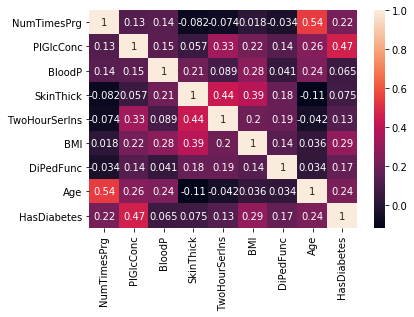

In [8]:
sns.heatmap(corr,annot=True)

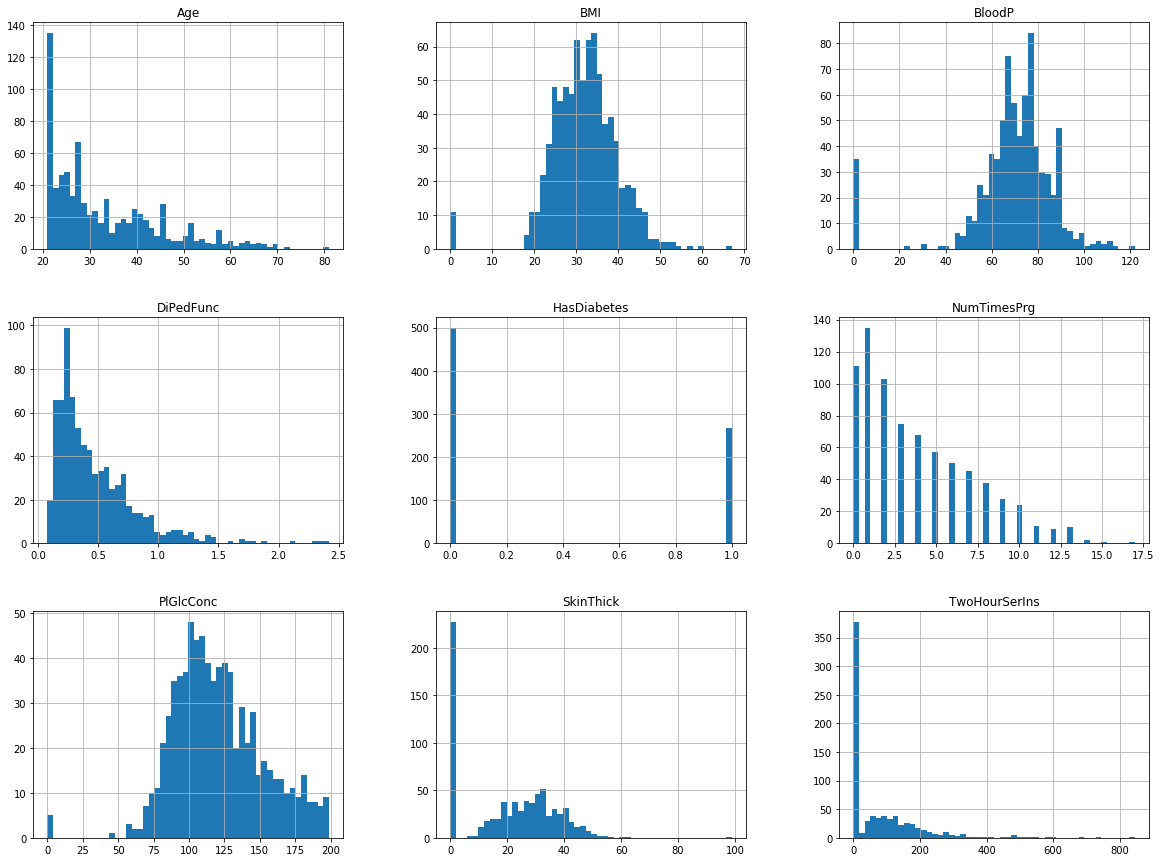

In [9]:
#Visualize the dataset
dataset.hist(bins=50, figsize=(20,15));
plt.show();

In [10]:
#An important thing I notice in the dataset (and that wasn't obvious at the beginning) 
#is the fact that some people have null (zero) values for some of the features: 
#it's not quite possible to have 0 as BMI or for the blood pressure.

#DATA CLEANING (Replace null values by median)
nonzero_column_array=["BMI","BloodP","PlGlcConc","SkinThick","TwoHourSerIns"]
for column in nonzero_column_array:
    median=dataset[column].median();
    dataset[column]=dataset[column].replace(to_replace=0, value=median)

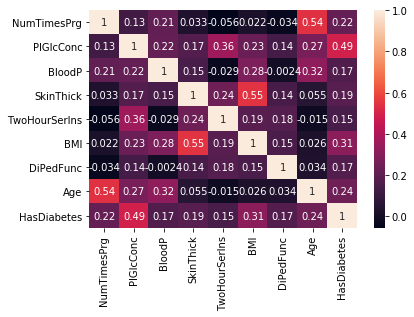

In [11]:
#dataset.hist(bins=50, figsize=(20,15)); #uncomment if you want see data after cleaning
#plt.show();
corr=dataset.corr();
sns.heatmap(corr,annot=True)

In [12]:
# Split the training dataset in 80% / 20%
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(dataset,test_size=0.20,random_state=0)

In [13]:
#Separate labels from rest of dataset i.e. Final column
train_set_labels=train_set["HasDiabetes"].copy()
train_set=train_set.drop("HasDiabetes", axis=1)

test_set_labels=test_set["HasDiabetes"].copy()
test_set=test_set.drop("HasDiabetes",axis=1);

In [14]:
train_set.shape

(614, 8)

In [15]:
test_set.shape

(154, 8)

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB();
classifier.fit(train_set,train_set_labels);

In [17]:
Predict=classifier.predict(test_set);
len(Predict)

154

In [18]:
cm=confusion_matrix(test_set_labels,Predict)
print(cm)


[[92 15]
 [19 28]]


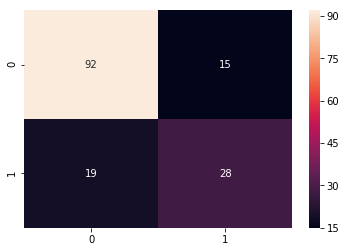

In [19]:
sns.heatmap(cm,annot=True)

In [20]:
accuracy=accuracy_score(test_set_labels,Predict)
print(accuracy)

0.7792207792207793


In [40]:
testlen=len(test_set_labels)
correctCount=0;
for i in range(154):
    if(Predict[i]==test_set_labels.iloc[i]):
        correctCount+=1;
print("Correct Count",correctCount)

print("Accuracy  : ",correctCount/testlen)


Correct Count 120
Accuracy  :  0.7792207792207793
